In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235
...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544


In [2]:
def isJan(date):
    if date[5:7] == '01':
        return 1
    else:
        return 0
    
df['isJan'] = df['DATE'].apply(lambda x: isJan(x))

df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY,isJan
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814,1
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186,0
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857,0
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161,0
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575,0
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963,0
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465,0
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544,0


In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US','CPI STICKY', 'isJan']
X = df[feature_labels]
y = df[['FORECLOSURE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)

In [4]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train.to_numpy().flatten())

RandomForestRegressor()

In [5]:
y_pred = regressor.predict(X_test)

In [6]:
r2_score(y_test,y_pred)

0.4259983548145836

In [7]:
X_train.head(20)

,DATE_DELTA,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,MORT30US,CPI STICKY,isJan
29,882.0,5.5,1.644091,0.377667,1.42009,0.50684,1.39629,240.222,3.5680,2.568902,0
69,2099.0,4.1,1.706818,1.829677,-0.10413,0.35482,-0.06923,257.305,3.6880,2.734200,0
23,699.0,5.7,2.242727,0.240645,-0.82572,0.92087,-2.99526,237.761,3.9640,2.443687,0
55,1673.0,4.2,2.889130,1.914839,1.74515,0.25883,1.07922,251.749,4.5500,2.430733,0
46,1400.0,4.5,2.353333,1.157000,2.92342,0.84327,-0.37884,247.284,3.9220,2.115031,0
96,2922.0,5.7,1.764000,0.079355,-6.09427,1.38990,-0.56375,281.933,3.4450,3.982988,1
16,485.0,6.4,2.197500,0.123226,0.87205,0.52723,0.33227,237.001,3.8400,2.066887,0
82,2496.0,9.2,0.870000,0.086333,3.14141,1.28503,2.26807,260.721,2.7650,1.786708,0
19,577.0,6.0,2.167143,0.138065,-2.91546,0.29712,-1.70481,238.033,3.9050,2.180240,0
89,2708.0,7.9,1.519091,0.078000,4.28688,2.63157,0.94626,270.955,2.9750,2.604632,0


---

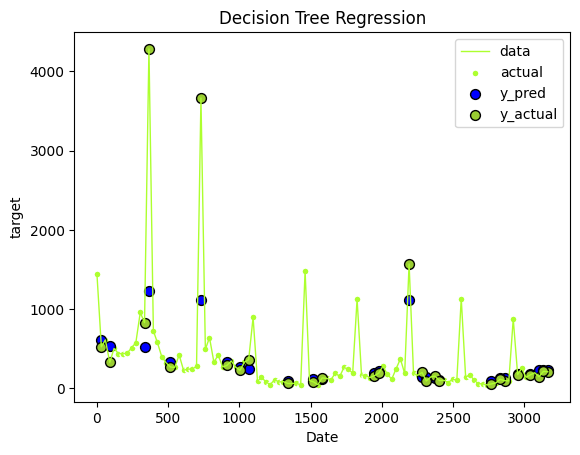

In [8]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

plt.xlabel("Date")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()